In [1]:
# Import libraries
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
crop = pd.read_csv("../data/crop_recommendation.csv")

# Exploratory Data Analysis (EDA)

In [3]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,87.0,36.0,37.0,20.879744,82.002744,6.502985,202.935536,rice
1,74.0,49.0,40.0,21.770462,80.319644,7.038096,226.655537,rice
2,78.0,59.0,42.0,23.004459,82.320763,7.840207,263.964248,rice
3,69.0,56.0,36.0,26.491096,80.158363,6.980401,242.864034,rice
4,70.0,35.0,41.0,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,39.0,60.0,21.0,26.774637,66.413269,6.780064,177.774507,coffee
2196,33.0,56.0,24.0,27.417112,56.636362,6.086922,127.924610,coffee
2197,4.0,80.0,19.0,24.131797,67.225123,6.362608,173.322839,coffee
2198,5.0,78.0,25.0,26.272418,52.127394,6.758793,127.175293,coffee
2199,16.0,55.0,25.0,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
crop.size

17600

In [6]:
crop.shape

(2200, 8)

In [7]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [8]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [9]:
crop.dtypes

N              float64
P              float64
K              float64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [10]:
crop['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [11]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,1300.000000,1300.000000,1300.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,40.792308,50.706923,46.183846,25.616244,71.481779,6.469480,103.463655
std,29.882808,30.858456,47.656416,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,19.000000,28.000000,21.000000,22.769375,60.261953,5.971693,64.551686
50%,33.000000,50.000000,33.000000,25.598693,80.473146,6.425045,94.867624
75%,60.000000,64.000000,45.000000,28.561654,89.948771,6.923643,124.267508
max,120.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


<AxesSubplot:>

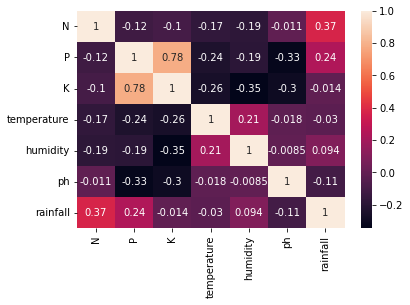

In [12]:
# Visualize correlation matrix
sns.heatmap(crop.corr(), annot=True)

# Machine Learning - Model Training

### Seperating features and target label

In [13]:
# Separating features and target label
features = crop[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
target = crop['label']

In [14]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [15]:
# Train-test split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features, target, test_size=0.2, random_state=2)

# Handle missing values in features
imputer = SimpleImputer(strategy='mean')
Xtrain_imputed = imputer.fit_transform(Xtrain)
features_imputed = imputer.fit_transform(features)

# Handle missing values in target variable (if necessary)
Ytrain.dropna(inplace=True)

# Train-test split with imputed features and non-missing target
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xtrain_imputed, Ytrain, test_size=0.2, random_state=2)

# Decision Tree

In [16]:
# Initialize Decision Tree classifier
decision_tree = DecisionTreeClassifier(criterion="entropy", random_state=2, max_depth=5)

# Fit the model on the training data
decision_tree.fit(Xtrain, Ytrain)

# Make predictions on the testing data
predicted_values_dt = decision_tree.predict(Xtest)

# Calculate accuracy
accuracy_dt = metrics.accuracy_score(Ytest, predicted_values_dt)

# Append accuracy and model name to respective lists
acc.append(accuracy_dt)
model.append('Decision Tree')

# Print accuracy
print("Decision Tree's Accuracy is: ", accuracy_dt * 100)

# Print classification report
print(classification_report(Ytest, predicted_values_dt))

Decision Tree's Accuracy is:  94.60227272727273
              precision    recall  f1-score   support

       apple       0.82      1.00      0.90        18
      banana       1.00      1.00      1.00        18
   blackgram       0.96      1.00      0.98        22
    chickpea       1.00      0.86      0.92        14
     coconut       0.86      1.00      0.93        19
      coffee       1.00      1.00      1.00        11
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        17
        jute       1.00      1.00      1.00         5
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        15
       maize       0.94      1.00      0.97        15
       mango       1.00      1.00      1.00        16
   mothbeans       1.00      1.00      1.00        17
    mungbean       1.00      1.00      1.00        15
   muskmelon       1.00      1.00      1.00        14
      orange       0.46      0.50

In [17]:
# Cross validation score (Decision Tree)
score_dt = cross_val_score(decision_tree, features_imputed, target, cv=5)
score_dt

array([0.92727273, 0.94772727, 0.94318182, 0.94545455, 0.93409091])

### Saving trained Decision Tree model

In [18]:
with open('../models/crop recommendation/decision_tree.pkl', 'wb') as f:
    pickle.dump(decision_tree, f)

# Guassian Naive Bayes

In [19]:
# Initialize Gaussian Naive Bayes classifier
naive_bayes = GaussianNB()

# Fit the model on the training data
naive_bayes.fit(Xtrain, Ytrain)

# Make predictions on the testing data
predicted_values_nb = naive_bayes.predict(Xtest)

# Calculate accuracy
accuracy_nb = metrics.accuracy_score(Ytest, predicted_values_nb)

# Append accuracy and model name to respective lists
acc.append(accuracy_nb)
model.append('Naive Bayes')

# Print accuracy
print("Naive Bayes's Accuracy is: ", accuracy_nb * 100)

# Print classification report
print(classification_report(Ytest, predicted_values_nb))

Naive Bayes's Accuracy is:  98.29545454545455
              precision    recall  f1-score   support

       apple       0.89      0.94      0.92        18
      banana       0.95      1.00      0.97        18
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        14
     coconut       1.00      1.00      1.00        19
      coffee       1.00      1.00      1.00        11
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        17
        jute       1.00      1.00      1.00         5
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        15
       maize       1.00      1.00      1.00        15
       mango       1.00      1.00      1.00        16
   mothbeans       1.00      1.00      1.00        17
    mungbean       1.00      1.00      1.00        15
   muskmelon       1.00      1.00      1.00        14
      orange       0.92      0.92  

In [20]:
# Cross validation score (Naive Bayes)
score_nb = cross_val_score(naive_bayes, features_imputed, target, cv=5)
score_nb

array([0.98409091, 0.97272727, 0.97954545, 0.97727273, 0.975     ])

### Saving trained Guassian Naive Bayes model

In [21]:
with open('../models/crop recommendation/naive_bayes.pkl', 'wb') as f:
    pickle.dump(naive_bayes, f)

# Support Vector Machine (SVM)

In [22]:
# Normalize data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
X_test_norm = norm.transform(Xtest)

# Initialize SVM classifier
svm = SVC(kernel='poly', degree=3, C=1)

# Fit the model on the normalized training data
svm.fit(X_train_norm, Ytrain)

# Make predictions on the normalized testing data
predicted_values_svm = svm.predict(X_test_norm)

# Calculate accuracy
accuracy_svm = metrics.accuracy_score(Ytest, predicted_values_svm)

# Append accuracy and model name to respective lists
acc.append(accuracy_svm)
model.append('SVM')

# Print accuracy
print("SVM's Accuracy is: ", accuracy_svm * 100)

# Print classification report
print(classification_report(Ytest, predicted_values_svm))

SVM's Accuracy is:  95.73863636363636
              precision    recall  f1-score   support

       apple       0.82      1.00      0.90        18
      banana       0.90      1.00      0.95        18
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        14
     coconut       0.95      1.00      0.97        19
      coffee       0.92      1.00      0.96        11
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        17
        jute       1.00      0.80      0.89         5
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        15
       maize       1.00      1.00      1.00        15
       mango       1.00      1.00      1.00        16
   mothbeans       1.00      1.00      1.00        17
    mungbean       1.00      1.00      1.00        15
   muskmelon       1.00      1.00      1.00        14
      orange       0.86      0.50      0.63

In [23]:
# Cross validation score (SVM)
score_svm = cross_val_score(svm, features_imputed, target, cv=5)
score_svm

array([0.91136364, 0.91590909, 0.91818182, 0.91818182, 0.925     ])

### Saving trained SVM model

In [24]:
with open('../models/crop recommendation/svm_classifier.pkl', 'wb') as f:
    pickle.dump(svm, f)

# Logistic Regression

In [25]:
# Scale the features using StandardScaler
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

# Initialize Logistic Regression classifier
logistic_regression = LogisticRegression(random_state=2, max_iter=1000)

# Fit the model on the scaled training data
logistic_regression.fit(Xtrain_scaled, Ytrain)

# Make predictions on the scaled testing data
predicted_values_lr = logistic_regression.predict(Xtest_scaled)

# Calculate accuracy
accuracy_lr = metrics.accuracy_score(Ytest, predicted_values_lr)

# Append accuracy and model name to respective lists
acc.append(accuracy_lr)
model.append('Logistic Regression')

# Print accuracy
print("Logistic Regression's Accuracy is: ", accuracy_lr * 100)

# Print classification report
print(classification_report(Ytest, predicted_values_lr))

Logistic Regression's Accuracy is:  89.48863636363636
              precision    recall  f1-score   support

       apple       0.65      0.94      0.77        18
      banana       0.78      1.00      0.88        18
   blackgram       1.00      1.00      1.00        22
    chickpea       0.93      1.00      0.97        14
     coconut       1.00      0.84      0.91        19
      coffee       0.92      1.00      0.96        11
      cotton       1.00      1.00      1.00        16
      grapes       0.75      0.71      0.73        17
        jute       1.00      0.80      0.89         5
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      0.93      0.97        15
       maize       0.94      1.00      0.97        15
       mango       1.00      1.00      1.00        16
   mothbeans       1.00      1.00      1.00        17
    mungbean       1.00      1.00      1.00        15
   muskmelon       0.93      1.00      0.97        14
      orange       0.78    

In [26]:
# Cross validation score (Logistic Regression)
score_lr = cross_val_score(logistic_regression, features_imputed, target, cv=5)
score_lr

array([0.93181818, 0.92045455, 0.90909091, 0.91363636, 0.92272727])

### Saving trained Logistic Regression model

In [27]:
with open('../models/crop recommendation/logistic_regression.pkl', 'wb') as f:
    pickle.dump(logistic_regression, f)

# Random Forest

In [28]:
# Initialize Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=20, random_state=0)

# Fit the model on the training data
random_forest.fit(Xtrain, Ytrain)

# Make predictions on the testing data
predicted_values_rf = random_forest.predict(Xtest)

# Calculate accuracy
accuracy_rf = metrics.accuracy_score(Ytest, predicted_values_rf)

# Append accuracy and model name to respective lists
acc.append(accuracy_rf)
model.append('Random Forest')

# Print accuracy
print("Random Forest's Accuracy is: ", accuracy_rf * 100)

# Print classification report
print(classification_report(Ytest, predicted_values_rf))

Random Forest's Accuracy is:  98.01136363636364
              precision    recall  f1-score   support

       apple       0.95      1.00      0.97        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        14
     coconut       1.00      1.00      1.00        19
      coffee       1.00      1.00      1.00        11
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        17
        jute       1.00      1.00      1.00         5
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        15
       maize       1.00      1.00      1.00        15
       mango       1.00      1.00      1.00        16
   mothbeans       1.00      1.00      1.00        17
    mungbean       1.00      1.00      1.00        15
   muskmelon       1.00      1.00      1.00        14
      orange       0.80      0.67

In [29]:
# Cross validation score (Random Forest)
score_rf = cross_val_score(random_forest, features_imputed, target, cv=5)
score_rf

array([0.98409091, 0.98409091, 0.97272727, 0.98409091, 0.97954545])

### Saving trained Random Forest model

In [30]:
with open('../models/crop recommendation/random_forest.pkl', 'wb') as f:
    pickle.dump(random_forest, f)

# XGBoost

In [31]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder and transform target variable Ytrain
Ytrain_encoded = label_encoder.fit_transform(Ytrain)

# Transform target variable Ytest using the same LabelEncoder instance
Ytest_encoded = label_encoder.transform(Ytest)

# Initialize XGBClassifier
xgboost_classifier = xgb.XGBClassifier()

# Fit XGBClassifier with encoded target variable
xgboost_classifier.fit(Xtrain, Ytrain_encoded)

# Make predictions on the testing data
predicted_values_xgb = xgboost_classifier.predict(Xtest)

# Calculate accuracy
accuracy_xgb = metrics.accuracy_score(Ytest_encoded, predicted_values_xgb)

# Append accuracy and model name to respective lists
acc.append(accuracy_xgb)
model.append('XGBoost')

# Print accuracy
print("XGBoost's Accuracy is: ", accuracy_xgb * 100)

# Print classification report
print(classification_report(Ytest_encoded, predicted_values_xgb))

XGBoost's Accuracy is:  98.29545454545455
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        19
           5       0.92      1.00      0.96        11
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        17
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00        20
          10       1.00      0.93      0.97        15
          11       1.00      1.00      1.00        15
          12       1.00      1.00      1.00        16
          13       1.00      1.00      1.00        17
          14       1.00      1.00      1.00        15
          15       1.00      1.00      1.00        14
          16       0.91      0.83      

In [32]:
# Train-test split for cross-validation
Xtrain_cv, Xtest_cv, Ytrain_cv, Ytest_cv = train_test_split(features_imputed, target, test_size=0.2, random_state=2)

# Encode target variable for cross-validation
Ytrain_encoded_cv = label_encoder.transform(Ytrain_cv)

# Cross validation score (XGBoost)
score_xgb = cross_val_score(xgboost_classifier, Xtrain_cv, Ytrain_encoded_cv, cv=5)
score_xgb

array([0.98295455, 0.97443182, 0.96875   , 0.98295455, 0.96590909])

### Saving trained XGBoost model

In [33]:
with open('../models/crop recommendation/xg_boost.pkl', 'wb') as f:
    pickle.dump(xgboost_classifier, f)

# Accuracy Comparison

In [34]:
accuracy_models = dict(zip(model, acc))
for _model,_acc in accuracy_models.items():
    print(_model, '-->', _acc)

Decision Tree --> 0.9460227272727273
Naive Bayes --> 0.9829545454545454
SVM --> 0.9573863636363636
Logistic Regression --> 0.8948863636363636
Random Forest --> 0.9801136363636364
XGBoost --> 0.9829545454545454


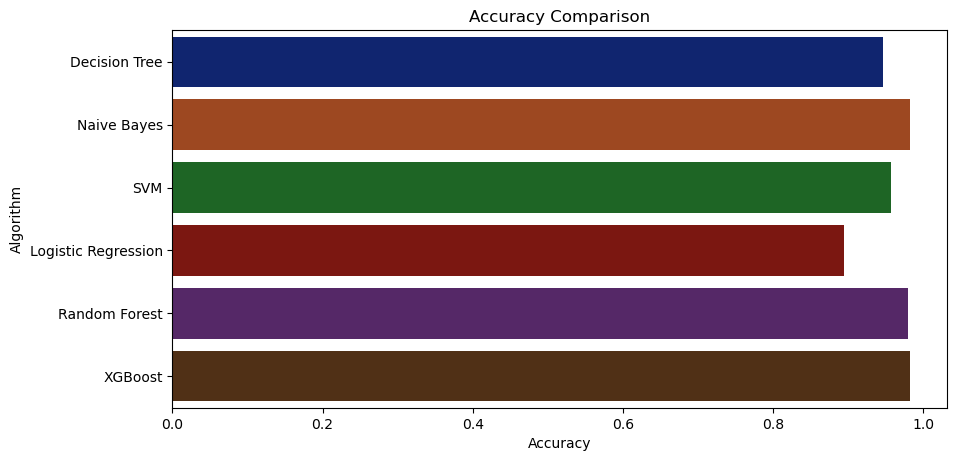

In [35]:
models = ['Decision Tree', 'Naive Bayes', 'SVM', 'Logistic Regression', 'Random Forest', 'XGBoost']
accuracies = [accuracy_dt, accuracy_nb, accuracy_svm, accuracy_lr, accuracy_rf, accuracy_xgb]
plt.figure(figsize=[10, 5], dpi=100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x=accuracies, y=models, palette='dark')
plt.show()

# Algorithm Analysis

**Let's peform algorithm analysis to choose best algorithm for our crop recommendation system:**

1. **Naive Bayes**:
   - Average Validation Score: 0.9801136363636364
   - Model Accuracy: 0.98409091
   
   
2. **XGBoost**:
   - Average Validation Score: 0.9829545454545454
   - Model Accuracy: 0.97159091


3. **Random Forest**:
   - Average Validation Score: 0.9744318181818182
   - Model Accuracy: 0.98409091


4. **SVM (Support Vector Machine)**:
   - Average Validation Score: 0.9602272727272727
   - Model Accuracy: 0.91136364


5. **Decision Tree**:
   - Average Validation Score: 0.9403409090909091
   - Model Accuracy: 0.950


6. **Logistic Regression**:
   - Average Validation Score: 0.8977272727272727
   - Model Accuracy: 0.93863636

<br>

**Now, let's rank them based on these criteria:**

1. **Naive Bayes**: Highest Validation Score (2nd) and High Model Accuracy (1st).

2. **Random Forest**: Similar Validation Score as XGBoost (3rd) but higher Model Accuracy.

3. **XGBoost**: Slightly lower Model Accuracy than Naive Bayes but has the highest Validation Score (1st).

4. **Decision Tree**: Moderate Validation Score (5th) and Model Accuracy (4th).

5. **SVM (Support Vector Machine)**: Moderate Validation Score (4th) but lower Model Accuracy (6th).

6. **Logistic Regression**: Lowest Validation Score (6th) and Moderate Model Accuracy (5th).

<br>

**Based on these rankings, the order from best to worst considering both validation score and model accuracy would be:**

1. Naive Bayes
2. Random Forest
3. XGBoost
4. Decision Tree
5. SVM
6. Logistic Regression

<br>

**For our model we choose Random Forest over Naive Bayes.**

<br>

**Reasons:**

| Aspect                     | Random Forest                                            | Naive Bayes                                                |
|:---------------------------|:---------------------------------------------------------|:-----------------------------------------------------------|
| **Model Complexity**       | Typically higher due to multiple decision trees, which can lead to overfitting if not tuned properly. | Simpler model architecture, less prone to overfitting.      |
| **Handling Nonlinearity** | Effective at capturing complex, nonlinear relationships in data due to the ensemble of decision trees. | Assumes independence between features, may struggle with nonlinear relationships. |
| **Robustness to Outliers** | Robust to outliers due to averaging predictions from multiple trees. | Sensitive to outliers as it assumes normal distribution of data. |
| **Interpretability**       | Less interpretable due to the complexity of multiple decision trees. | More interpretable due to its simple probabilistic framework. |
| **Scalability**            | May be slower and require more computational resources, especially with large datasets. | Faster and more computationally efficient, especially with large datasets. |
| **Handling Missing Data**  | Can handle missing data well through techniques like imputation and averaging. | Requires handling missing data before training. Complete case analysis or imputation methods may be used. |
| **Performance on Small Datasets** | May not perform well on small datasets due to overfitting. | Performs well on small datasets and requires fewer instances to train. |
| **Performance with Categorical Features** | Handles categorical features well, including high-cardinality categorical variables. | Struggles with categorical features unless appropriately encoded or discretized. |
| **Parameter Sensitivity**  | More parameters to tune, which can require more effort in optimization. | Fewer parameters to tune, making it easier to implement and less prone to overfitting in parameter tuning. |

# Making a prediction

In [36]:
data = np.array([[104, 18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = random_forest.predict(data)
print(prediction)

['pigeonpeas']


In [37]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = random_forest.predict(data)
print(prediction)

['pigeonpeas']
